### Introduction
<font size='3'>
    
In this mission, we will investigate possible relationships/correlations between SAT scores and demographics. We have acquired several data sets containing information about [New York City public schools](https://data.cityofnewyork.us/data?cat=education). We have a combined dataset containg those informations.

In [1]:
import pandas as pd
combined = pd.read_csv("combined.csv")

In [2]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to New York City residents,0,0,0,0,0,"220 Henry Street\r\nNew York, NY 10002\r\n(40....",40.713764,-73.985260,1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,"200 Monroe Street\r\nNew York, NY 10002\r\n(40...",40.712332,-73.984797,1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,"420 East 12 Street\r\nNew York, NY 10009\r\n(4...",40.729783,-73.983041,1
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"145 Stanton Street\r\nNew York, NY 10002\r\n(4...",40.720569,-73.985673,1
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,"111 Columbia Street\r\nNew York, NY 10002\r\n(...",40.718725,-73.979426,1


### Finding Correlations With the r Value
<font size='3'>
  
Correlations tell us how closely related two columns are. We'll be using the [r value](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient), also called [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient), which measures how closely two sequences of numbers are correlated.

In [3]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
priority09                              NaN
priority10                              NaN
lat                               -0.121029
lon                               -0.132222
school_dist                        0.042948
Name: sat_score, Length: 71, dtype: float64


### Plotting Enrollment 
<font size='3'>
  
Above we can see, `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg. Score`, and `sat_score` are strongly correlated with `sat_score`.


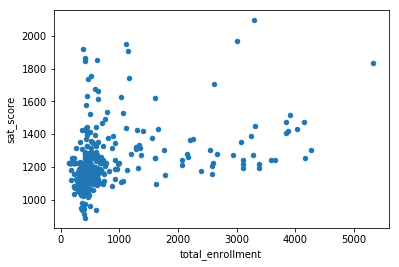

In [5]:
import matplotlib.pyplot as plt
combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

In [16]:
#percentage of females (female_per) and number of females (female_num) 
correlations["female_per"], correlations["female_num"]

(0.11210773942203286, 0.3886308195178935)

In [17]:
#percentage of males (male_per) and the number of males (male_num) 
correlations["male_per"], correlations["male_num"]

(-0.11206243686028577, 0.32551984909928616)

In [11]:
#Teacher and student ratings of school safety (saf_t_11, and saf_s_11) correlate with sat_score
correlations["saf_t_11"], correlations["saf_s_11"]

(0.3138103333520104, 0.3376387443608813)

In [13]:
#Student ratings of school academic standards (aca_s_11) correlate with sat_score, 
#but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11).
correlations["aca_s_11"], correlations["aca_t_11"], correlations["aca_p_11"]

(0.33943547354225323, 0.13234766778256465, 0.035154618008655825)

In [15]:
#There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
correlations["white_per"], correlations["asian_per"], correlations["black_per"], correlations["hispanic_per"]

(0.6207177638526802,
 0.5707302200214872,
 -0.2841394684581478,
 -0.3969849307814719)

### Exploring Schools With Low SAT Scores and Enrollment
<font size='3'>

There's an interesting cluster of points at the bottom left where `total_enrollment` and `sat_score` are both low. This cluster may be what's making the r value so high.

Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between `sat_score` and `total_enrollment`. If there was a very strong correlation, we'd expect all of the points to line up. 

In [19]:
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
print(low_enrollment["School Name"])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


### Plotting Language Learning Percentage
<font size='3'>
  
Most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually `ell_percent` that correlates strongly with `sat_score`, rather than `total_enrollment`. 

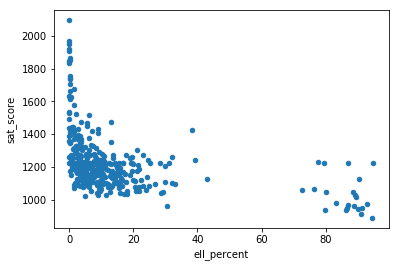

In [20]:
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

### Mapping the Schools With Basemap
<font size='3'>
  
It seems `ell_percent` correlates with `sat_score` more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high `ell_percent` values and low `sat_score` values. This cluster represents the same group of international high schools we investigated earlier.

For better understanding of this relationship, we'll want to map out `ell_percent` by school district. The map will show us which areas of the city have a lot of English language learners.

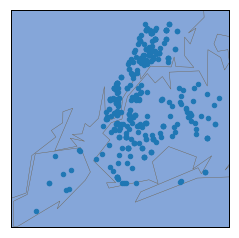

In [35]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)
plt.show()

### Plotting Out Statistics
<font size='3'>
  
We've plotted the school locations and in the above plot school density is highest in the top of the map.

We can begin to display meaningful information on the maps, such as the percentage of English language learners by area by passing the keyword argument `c` into the `scatter()` method.

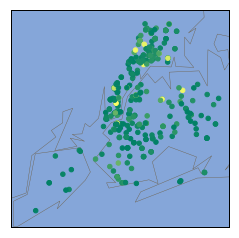

In [36]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")
plt.show()

### Calculating District-Level Statistics
<font size='3'>
  
Unfortunately, due to the number of schools, it's hard to interpret the above map. One way to make very granular statistics easier to read is to aggregate them. We can aggregate by district, which will enable us to plot `ell_percent` district-by-district instead of school-by-school.

In [37]:
import numpy

#group according to school district and aggregate over the mean value
districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)
print(districts.head())

   school_dist  SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0            1                       441.833333           473.333333   
1            2                       426.619092           444.186256   
2            3                       428.529851           437.997512   
3            4                       402.142857           416.285714   
4            5                       427.159915           438.236674   

   SAT Writing Avg. Score    sat_score  AP Test Takers   Total Exams Taken  \
0              439.333333  1354.500000       116.681090         173.019231   
1              424.832836  1295.638184       128.908454         201.516827   
2              426.915672  1293.443035       156.183494         244.522436   
3              405.714286  1224.142857       129.016484         183.879121   
4              419.666098  1285.062687        85.722527         115.725275   

   Number of Exams with scores 3 4 or 5       Cohort  Total Cohort  ...  \
0                      

### Plotting Percent Of English Learners by District
<font size='3'>
  
From the means of all of the columns, now we can plot out `ell_percent` by district. We can also took the means of the `lon` and `lat` columns, which will give us the coordinates for the center of each district.

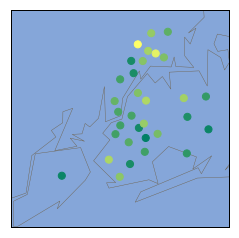

In [38]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")
plt.show()

In this mission, we found correlations, created visualizations, and mapped out our schools!